In [1]:
state = 'ID' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 4 plans from file.


In [6]:
obj_type = 'perimeter'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
            state=state,
            year=year
        )

Running epsilon constraint method for state ID, objective perimeter
####################################################################################################

L = 910358 and U = 928748

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]]
Objective value: 67.92867059645073
Deviation: 0.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints 

     0     0   34.34855    0   63   67.92867   34.34855  49.4%     -    0s
     0     0   34.40867    0   63   67.92867   34.40867  49.3%     -    0s
     0     0   34.53024    0   64   67.92867   34.53024  49.2%     -    0s
H    0     0                      62.2523782   34.53024  44.5%     -    0s
H    0     0                      61.8808807   34.53024  44.2%     -    0s
     0     0   34.53024    0   65   61.88088   34.53024  44.2%     -    0s
     0     0   34.53263    0   61   61.88088   34.53263  44.2%     -    0s
     0     0   34.55150    0   61   61.88088   34.55150  44.2%     -    0s
     0     2   34.78244    0   61   61.88088   34.78244  43.8%     -    0s
H  155   168                      60.7316263   37.73111  37.9%  32.4    1s
H  226   217                      59.0327689   39.76817  32.6%  26.9    1s
H  291   256                      54.6519146   39.88132  27.0%  25.4    1s
*  360   291              12      51.5653559   41.05389  20.4%  26.0    1s
*  364   291             

Variable types: 0 continuous, 530 integer (530 binary)

Root relaxation: objective 3.281138e+01, 73 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   32.81138    0   40   67.92867   32.81138  51.7%     -    0s
     0     0   33.71821    0   46   67.92867   33.71821  50.4%     -    0s
     0     0   34.02707    0   55   67.92867   34.02707  49.9%     -    0s
     0     0   34.14136    0   55   67.92867   34.14136  49.7%     -    0s
     0     0   34.15619    0   58   67.92867   34.15619  49.7%     -    0s
     0     0   34.27527    0   61   67.92867   34.27527  49.5%     -    0s
     0     0   34.29008    0   62   67.92867   34.29008  49.5%     -    0s
     0     0   34.35233    0   60   67.92867   34.35233  49.4%     -    0s
     0     0   34.38064    0   61   67.92867   34.38064  49.4%     -    0s
     0     0   34.49593    0  

IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1314 rows, 1052 columns and 3871 nonzeros
Model fingerprint: 0x884cc3fa
Variable types: 264 continuous, 788 integer (788 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objective 67.9287 (0.02s)
Loaded user MIP start with objective 67.9287

Presolve removed 792 rows and 523 columns
Presolve time: 0.05s
Presolved: 522 rows, 529 columns, 1627 nonzeros
Variable types: 0 continuous, 529 integer (529 binary)

Root relaxation: objective 3.281166e+01, 67 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   32.81166    0   39   67.92867   32.81166  51.7%     -    0s
     0     0   33.28298    0   45   67.92867   33

     0     0   34.96142    0   70   67.92867   34.96142  48.5%     -    1s
     0     0   34.96991    0   72   67.92867   34.96991  48.5%     -    1s
     0     0   35.05751    0   75   67.92867   35.05751  48.4%     -    1s
     0     0   35.11291    0   75   67.92867   35.11291  48.3%     -    1s
     0     0   35.12172    0   77   67.92867   35.12172  48.3%     -    1s
     0     0   35.12211    0   77   67.92867   35.12211  48.3%     -    1s
     0     0   35.12618    0   78   67.92867   35.12618  48.3%     -    1s
     0     0   35.13609    0   78   67.92867   35.13609  48.3%     -    1s
     0     0   35.13809    0   80   67.92867   35.13809  48.3%     -    1s
     0     0   35.13830    0   81   67.92867   35.13830  48.3%     -    1s
     0     0   35.21968    0   75   67.92867   35.21968  48.2%     -    1s
     0     0   35.22637    0   85   67.92867   35.22637  48.1%     -    1s
     0     0   35.22694    0   86   67.92867   35.22694  48.1%     -    1s
     0     0   35.26310  


User-callback calls 733548, time in user-callback 7.14 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]]
Deviation is too small, stopping early.


In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state ID,  objective perimeter
####################################################################################################

Pareto front plans: [[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 2, 3, 5, 8, 11, 16, 18, 22, 25, 26, 27, 30, 32, 33, 35], [0, 4, 6, 7, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 23, 24, 28, 29, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]], [[1, 2, 11, 12, 15, 21, 24, 33, 34], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 21, 24, 28, 33],

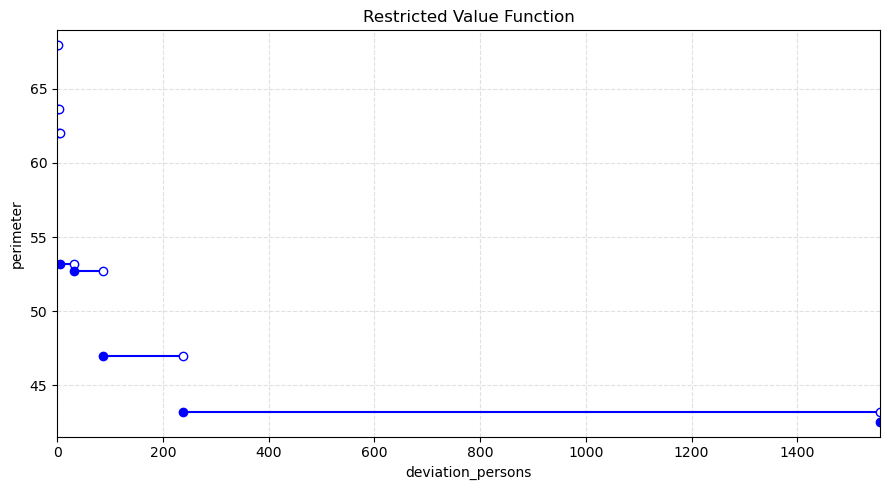

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors) 


####################################################################################################
Pareto maps for state ID, objective perimeter
####################################################################################################



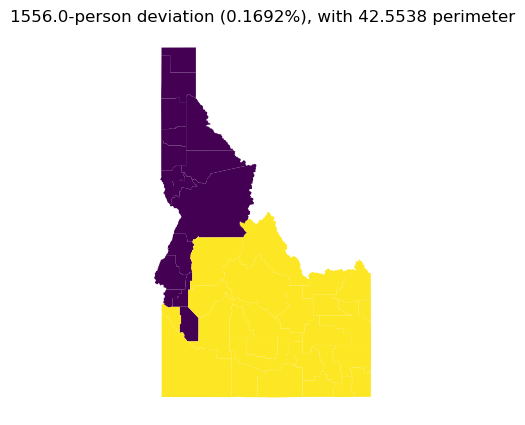

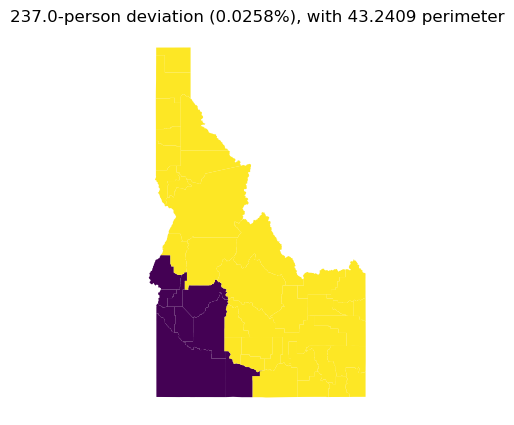

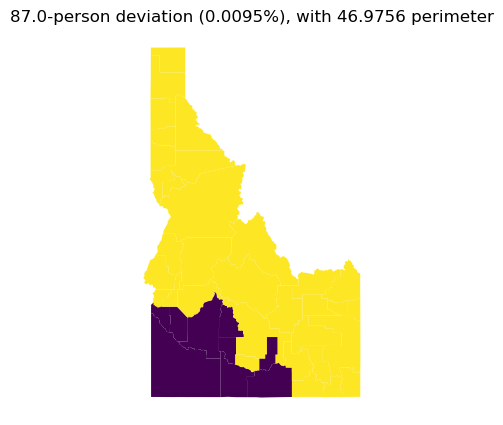

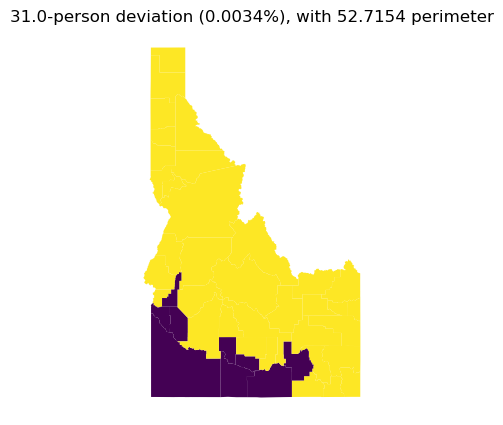

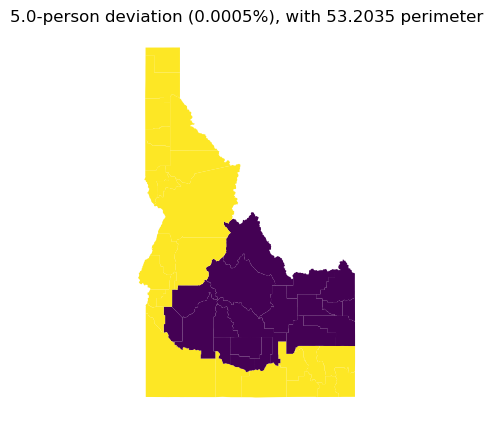

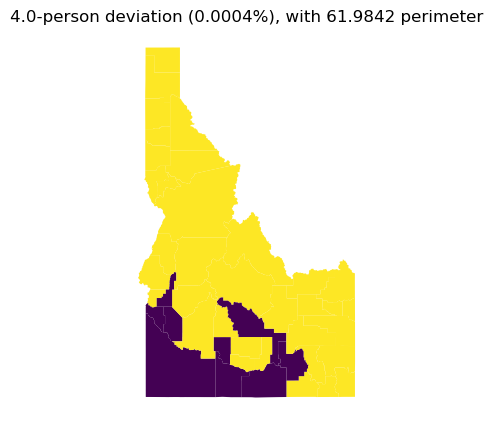

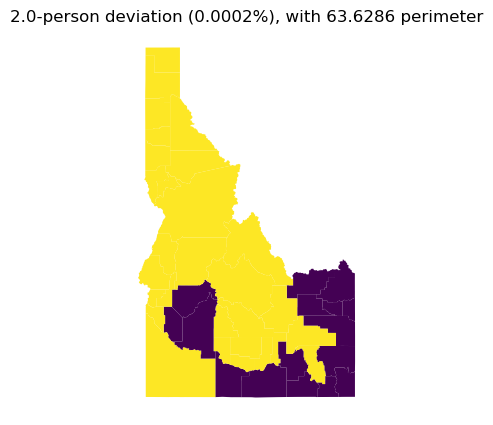

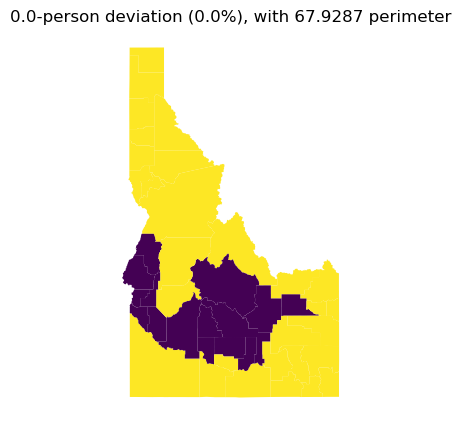

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)